In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [124]:
class ScratchLinearRegression():
    """
    線形回帰のスクラッチ実装
    
    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    no_bias : bool
      バイアス項を入れない場合はTrue
    verbose : bool
      学習過程を出力する場合はTrue
    
    Attributes
    ----------
    self.coef_ : 次の形のndarray, shape (n_features,)
      パラメータ
    self.loss : 次の形のndarray, shape (self.iter,)
      訓練データに対する損失の記録
    self.val_loss : 次の形のndarray, shape (self.iter,)
      検証データに対する損失の記録
    """
    
    def __init__(self, num_iter, lr, no_bias, verbose):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.no_bias = no_bias
        self.verbose = verbose
        # 損失を記録する配列を用意
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)
        self.loss = np.zeros(self.iter)
        
        self.theta_arr = []
        self.theta = 0
        # self.coef_ = 0
        
    def fit(self, X, y, X_val=None, y_val=None):
        """
        線形回帰を学習する。検証データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証データの正解値
        """
        # 検証データフラグ
        if X_val is None:
            is_exists = False
        else:
            is_exists = True
        
        # バイアス
        if self.no_bias:
            pass
        else:
            X = self._add_bias(X)
            
            if is_exists:
                X_val = self._add_bias(X_val)
        
        # 最急降下法(訓練データ)
        self._gradient_descent(X, y, True)
        
        # 最急降下法(検証データ)
        if is_exists:
            self._gradient_descent(X_val, y_val, False)
        
        # 学習結果を出力
        if self.verbose:
        
            # verboseをTrueにした際は学習過程を出力
            plt.plot(np.arange(self.iter), self.loss)
            if is_exists:
                plt.plot(np.arange(self.iter), self.val_loss)
        
    def _gradient_descent(self, X, y, is_train):
        
        # j_theta, theta を記録する配列
        min_j_theta = 0
        min_theta = 0
        tmp_theta = 0
        
        #特徴量の数だけランダムな値シータを生成
        tmp_theta = np.reshape(np.random.rand(X.shape[1]), [1,X.shape[1]])
        
        # 【問題2】最急降下法
        for i in range(self.iter):
        
            # 仮定関数より、予測値を算出する
            hx = self._linear_hypothesis(X, tmp_theta)
        
            # 誤差を算出(後続の計算用に転地しておく)
            err = np.array(hx.T - y).T

            if is_train:                
                # パラメータの更新
                tmp_theta = tmp_theta - self.lr*(np.mean(err * X, axis = 0))
                self.theta_arr.append(tmp_theta)
            else:
                tmp_theta = self.theta_arr[i]
        
            # 平均二乗誤差を算出(予測値 hx を引数のシェイプに合わせている)
            mse = MSE(np.reshape(hx, [hx.shape[0],]), y.T)
        
            # 目的関数（損失関数）を算出
            j_theta = mse/2
            
            if is_train:
                # 目的関数（損失関数）を記録
                self.loss[i] = j_theta
                
                # 最小になる損失関数を保持
                if i == 0 or j_theta < min_j_theta:
                    min_j_theta = j_theta
                    min_theta = tmp_theta
            else:
                # 目的関数（損失関数）を記録
                self.val_loss[i] = j_theta
               
        if is_train:
            # シータの学習結果を設定
            self.theta = min_theta
            # print(self.theta)
        
    def predict(self, X):
        """
        線形回帰を使い推定する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル
        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            線形回帰による推定結果
        """
        # バイアス
        if self.no_bias:
            pass
        else:
            X = self._add_bias(X)
            
        y_pred = self._linear_hypothesis(X, self.theta)
        
        return y_pred
    
    def _linear_hypothesis(self, X, theta):
        """
        線形の仮定関数を計算する
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
          訓練データ
        Returns
        -------
          次の形のndarray, shape (n_samples, 1)
          線形の仮定関数による推定結果
        """
        # 【問題1】仮定関数
        # 仮定関数より予測値を算出
        hx = np.dot(X, theta.T)
        
        return hx
    
    def _add_bias(self, X):
        
        X = np.concatenate([np.ones((X.shape[0],1), int), X], 1)
        
        return X

In [125]:
def MSE(y_pred, y):
    """
    平均二乗誤差の計算
    Parameters
    ----------
    y_pred : 次の形のndarray, shape (n_samples,)
      推定した値
    y : 次の形のndarray, shape (n_samples,)
      正解値
    Returns
    ----------
    mse : numpy.float
      平均二乗誤差
    """

    mse = np.sum((y_pred - y)**2)/y_pred.shape[0]
    
    return mse

In [126]:
# データセットの読み込み
csv_path = "../../../input/house-prices-advanced-regression-techniques/train.csv" # ファイル名（パス）を指定する

df = pd.read_csv(csv_path)

df = df.loc[:, ["GrLivArea", "SalePrice","YearBuilt"]]
X = df.loc[:, ["GrLivArea","YearBuilt"]].values
y = df.loc[:, ["SalePrice"]].values
y = np.reshape(y,[y.shape[0],])

In [127]:
# データセットの分割
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train)

In [128]:
slr = ScratchLinearRegression(1000, 0.000000001, False, True)

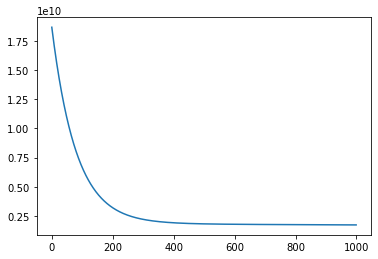

In [129]:
slr.fit(X_train, y_train)

In [130]:
print(slr.predict(X_test))

[[205482.91811096]
 [167081.17391087]
 [200552.68764658]
 [279403.11958957]
 [195852.16132643]
 [213769.40605141]
 [168266.0406071 ]
 [193176.14010511]
 [226836.72810076]
 [171068.67447489]
 [134804.05667385]
 [150124.50526153]
 [195088.97588356]
 [165336.187378  ]
 [218934.06365365]
 [209109.64034045]
 [157092.14946628]
 [149846.0694003 ]
 [152265.01049965]
 [202633.50339551]
 [237928.62203328]
 [201045.27761112]
 [170207.33506801]
 [170530.38636743]
 [203135.01644769]
 [169589.34588661]
 [146091.7825445 ]
 [189745.85652856]
 [191358.07945159]
 [149972.20605686]
 [196114.91642184]
 [169169.83004272]
 [175503.67357536]
 [192214.35059984]
 [164776.06754135]
 [172708.27337565]
 [171356.50941368]
 [147727.39589135]
 [147607.41019815]
 [171917.23596514]
 [190289.08216976]
 [159404.48950389]
 [154621.96597546]
 [216928.01144491]
 [191750.08859285]
 [182249.9300087 ]
 [157080.45425437]
 [175799.34889705]
 [181496.14364339]
 [169227.22339755]
 [154777.03730439]
 [160457.675295  ]
 [180257.262

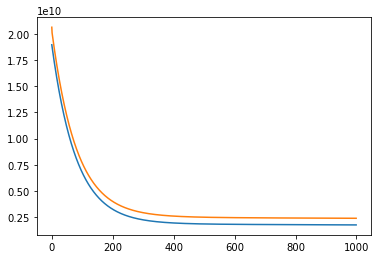

In [131]:
slr.fit(X_train, y_train, X_val, y_val)

In [221]:
# 本家
X = df.loc[:, ["GrLivArea", "YearBuilt"]]
y = df.loc[:, ["SalePrice"]]

# sklearnのから各種モデルをimportする
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# データの前処理
# データを分割
X_train, X_test, y_train, y_test = train_test_split(X, y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train)

# インスタンス作成から学習
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

y_pred = linear_reg.predict(X_test)
print('r^2 本家: ', r2_score(y_test, y_pred))

# スクラッチ
X = df.loc[:, ["GrLivArea","YearBuilt"]].values
y = df.loc[:, ["SalePrice"]].values
y = np.reshape(y,[y.shape[0],])

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train)

slr = ScratchLinearRegression(10000, 0.00000005, False, False)

slr.fit(X_train, y_train)
y_pred = slr.predict(X_test)

print('r^2 スクラッチ: ', r2_score(y_test, y_pred))



r^2 本家:  0.5884290088612507
r^2 スクラッチ:  0.5894534894910582
